# Composite Map Tutorial: STIX + Other Images

This tutorial demonstrates how to overplot STIX solar image maps on other solar maps, for example from AIA, HMI, or STEREO. A prerequisite is a STIX map reprojected to the desired reference frame, or vice versa, as described in [the reprojection tutorial](https://github.com/elastufka/stix_tutorials/blob/main/reprojection_tutorial.ipynb). Here more in-depth plotting options are covered.

Required packages:

- sunpy
- reproject
- astropy
- matplotlib


In [60]:
import sunpy
import sunpy.map
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy import units as u
import matplotlib
import warnings
%matplotlib inline

## Example: STIX + AIA from AIA perspective

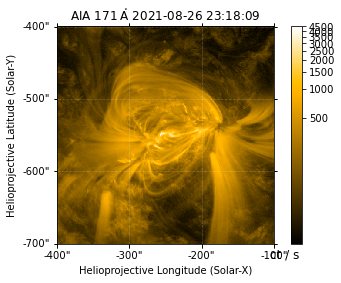

In [2]:
aia_sm=sunpy.map.Map('sample_data/aia_lev1_171a_2021_08_26t23_18_09_35z_image_lev1_cutout.fits') 
aia_sm.peek() #this is the map that will be used as the background to overplot STIX image contours

In [4]:
# have to include this line for sunpy.Map to read STIX maps
u.add_enabled_units([u.def_unit("arcsecs",1*u.arcsec)])

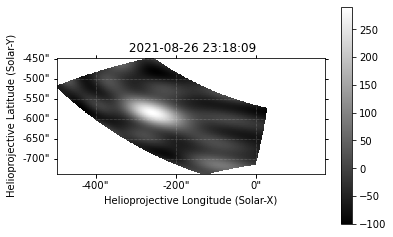

In [14]:
stix_map = sunpy.map.Map("sample_data/stix_image_sci_5450_uid_2108260029_12.0-28.0keV_full_disk_bp_map_reprojected.fits")
stix_map.peek()

### Create composite map

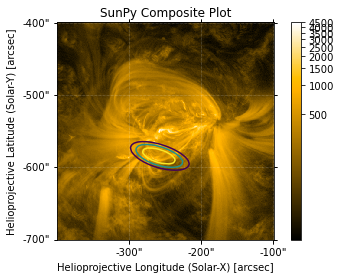

In [15]:
# STIX -> AIA
comp_map=sunpy.map.Map(aia_sm, stix_map.submap(aia_sm.bottom_left_coord,top_right=aia_sm.top_right_coord),composite=True)
levels = [70,80,90] #contour levels in percent
comp_map.set_levels(index=1, levels=levels, percent=True)
comp_map.peek()

### Change color scale

The basic image is nice, but important features can stand out more with different color choices

In [31]:
from matplotlib import cm
from matplotlib.colors import Normalize, LogNorm

Let's start by changing the colormap itself (it might be a better idea to leave the default one since people are used to looking at AIA data like that)

See matplotlib colormaps [here](https://matplotlib.org/stable/tutorials/colors/colormaps.html).

First look at the current settings for the AIA map:

In [27]:
aia_plot_settings = comp_map.get_plot_settings(0)
aia_plot_settings

{'cmap': 'sdoaia171',
 'norm': <astropy.visualization.mpl_normalize.ImageNormalize at 0x7fd60afee810>,
 'interpolation': 'nearest',
 'origin': 'lower'}

In [70]:
#change the color map
aia_plot_settings['cmap'] = cm.hot

In [54]:
#change the normalization to emphasize areas with higher data numbers
aia_plot_settings['norm'] = Normalize(vmin = 0, vmax = 5000)

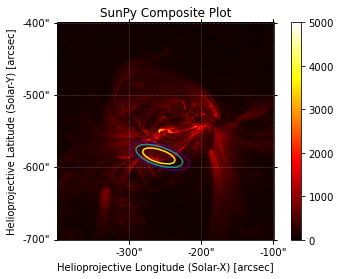

In [55]:
# assign the plot settings back to the map
comp_map.set_plot_settings(0, aia_plot_settings)
comp_map.peek()

It's also possible to do log normalization 

In [82]:
aia_plot_settings['norm'] = LogNorm(vmin = 40, vmax = 2000)

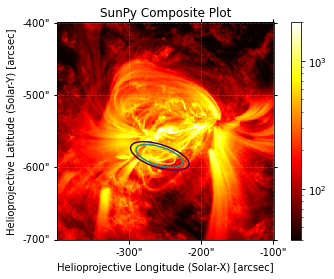

In [83]:
# assign the plot settings back to the map
comp_map.set_plot_settings(0, aia_plot_settings)
comp_map.peek()

### Reverse color scale

It can be useful to reverse the colorscale so that the X-ray contours aren't lost on the EUV/UV image. With most colorscales, this can be acheived by adding \_r to the end of the colorscale name. For custom colorscales, such as the SunPy colorscales, follow the example below. 

In [84]:
aia_plot_settings['cmap'] = plt.get_cmap('sdoaia171').reversed()

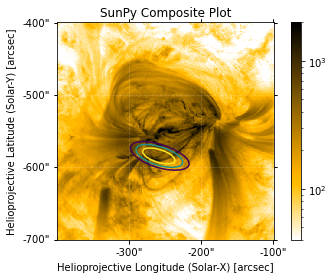

In [85]:
# assign the plot settings back to the map
comp_map.set_plot_settings(0, aia_plot_settings)
comp_map.peek()

### Change levels and colors of contours

We can adjust the contour levels and line colors to improve the contrast.

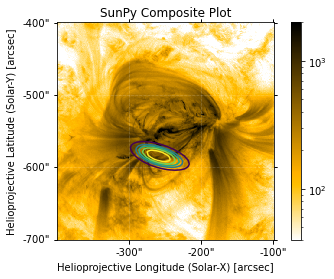

In [89]:
new_levels = [70, 80, 85, 90, 95]
comp_map.set_levels(1,new_levels, percent=True)
comp_map.peek()

Currently changing the line colors and widths in the contour plot is not possible in the SunPy API due to a bug, but this can be worked around:

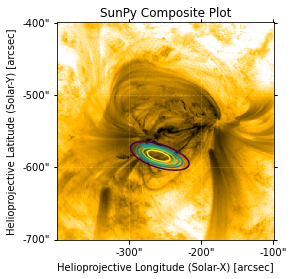

In [159]:
map0 = comp_map.get_map(0)
plots = comp_map.plot()

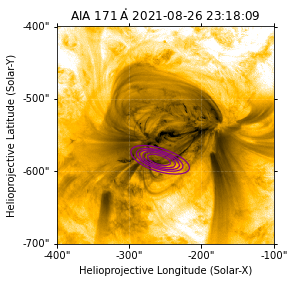

In [177]:
color_list = ['darkmagenta' for l in new_levels]

fig = plt.figure()
ax = fig.add_subplot(projection = aia_sm)
map0.plot(axes = ax) 
contour = ax.contour(plots[1], colors = color_list, linewidths = 1.25)

### Change axis labels and title

Make the axis labels and title more informative

Text(0.5, 1.0, 'STIX back projection on AIA 171 $\\AA$ \n 2021-08-26T23:18:09')

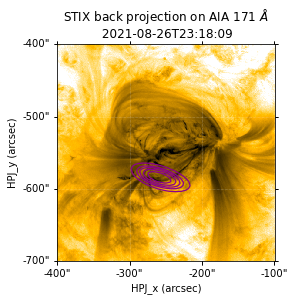

In [187]:
fig = plt.figure()
ax = fig.add_subplot(projection = aia_sm)
map0.plot(axes = ax) 
contour = ax.contour(plots[1], colors = color_list, linewidths = 1.25)
ax.set_xlabel('HPJ_x (arcsec)')
ax.set_ylabel('HPJ_y (arcsec)')
ax.set_title(f'STIX back projection on AIA 171 $\AA$ \n {stix_map.meta["date-obs"][:-4]}')

### Plot with the colorbar

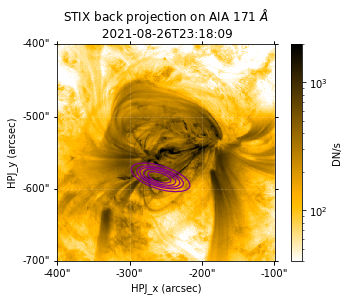

In [190]:
fig = plt.figure()
ax = fig.add_subplot(projection = aia_sm)
cb = map0.plot(axes = ax) 
contour = ax.contour(plots[1], colors = color_list, linewidths = 1.25)
ax.set_xlabel('HPJ_x (arcsec)')
ax.set_ylabel('HPJ_y (arcsec)')
ax.set_title(f'STIX back projection on AIA 171 $\AA$ \n {stix_map.meta["date-obs"][:-4]}')
cbar = plt.colorbar(cb)
cbar.set_label("DN/s")